<a href="https://colab.research.google.com/github/vaguiarfinance/AprendizadoDNC/blob/main/Correla%C3%A7%C3%A3o_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correlação

## Regressão Linear Simples

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [ ]:
dataset = {"tempo":[1,3,4,4,6,8,10,10,11,13],
           "vendas":[91,110,106,116,119,129,139,143,138,159]
}

dataset = pd.DataFrame(dataset)
dataset.head()

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


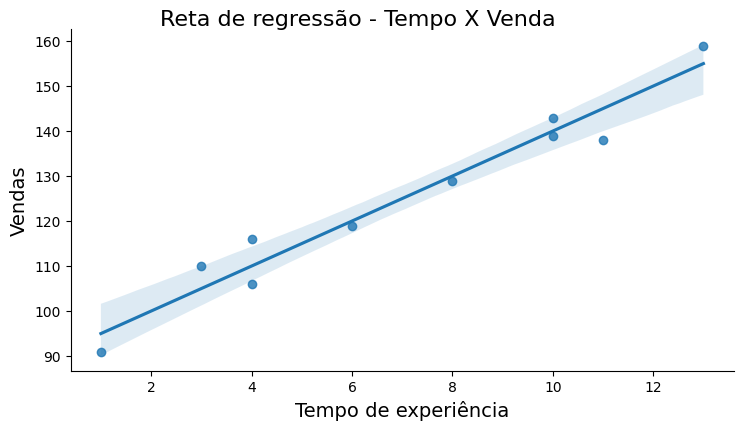

In [ ]:
from pandas.io.sql import DatabaseError
ax = sns.lmplot(x="tempo", y="vendas", data=dataset)
ax.fig.set_size_inches(8,4)
ax.fig.suptitle("Reta de regressão - Tempo X Venda", fontsize=16, y=1.02)
ax.set_xlabels("Tempo de experiência", fontsize=14)
ax.set_ylabels("Vendas", fontsize=14)

In [ ]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


In [ ]:
Y = dataset.vendas
X = sm.add_constant(dataset.tempo)

In [ ]:
resultado_regressão = sm.OLS(Y,X).fit()

In [ ]:
print(resultado_regressão.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           1.22e-06
Time:                        18:28:32   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
dataset["Y_previsto"] = resultado_regressão.predict()
dataset.head()

,tempo,vendas,Y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


In [ ]:
dataset["residuo"] = dataset["Y_previsto"] - dataset["vendas"]
dataset.head()

,tempo,vendas,Y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0


### CASE_base de Aprovação dos Alunos

In [ ]:
alunos = pd.read_excel("base_aprovacao_alunos.xlsx")
alunos.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


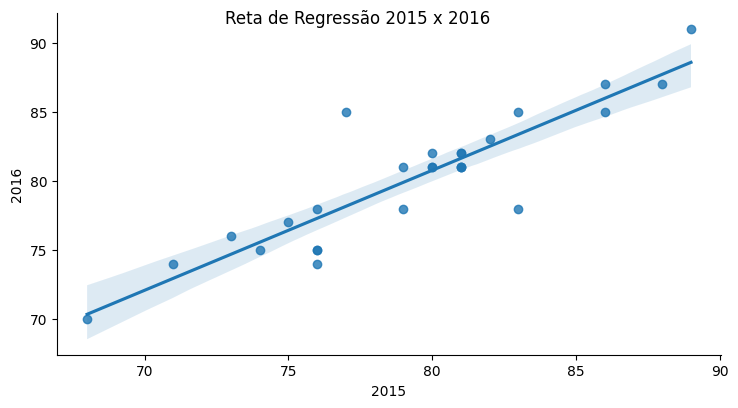

In [ ]:
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=alunos)
ax.fig.set_size_inches(8,4)
ax.fig.suptitle("Reta de Regressão 2015 x 2016")
ax.set_xlabels("2015")
ax.set_ylabels("2016")
ax;

In [ ]:
alunos.corr()


<ipython-input-14-8d6a2a5b8151>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  alunos.corr()


,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [ ]:
Y = alunos.ano_2016
X = sm.add_constant(alunos.ano_2015)

In [ ]:
resultado_regressao = sm.OLS(Y,X).fit()

In [ ]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Tue, 01 Aug 2023   Prob (F-statistic):           3.02e-10
Time:                        18:34:32   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [ ]:
alunos["Y_previsto"] = resultado_regressao.predict()
alunos.head()

,UF,ano_2015,ano_2016,Y_previsto
0,Rondonia,77,85,78.159571
1,Acre,79,81,79.895812
2,Amazonas,83,85,83.368294
3,Roraima,81,82,81.632053
4,Para,73,76,74.687089


In [ ]:
alunos["residuo"] = alunos["Y_previsto"] - alunos["ano_2016"]
alunos.head()

,UF,ano_2015,ano_2016,Y_previsto,residuo
0,Rondonia,77,85,78.159571,-6.840429
1,Acre,79,81,79.895812,-1.104188
2,Amazonas,83,85,83.368294,-1.631706
3,Roraima,81,82,81.632053,-0.367947
4,Para,73,76,74.687089,-1.312911


## Regressão Linear Multipla

In [ ]:
#Importe o arquivo formato xlsx
limite = pd.read_excel("Limite_Credito.xlsx")
limite.head()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
0,70,10736,5214,400,500
1,68,5000,5000,380,600
2,44,5800,5800,500,800
3,72,4300,4300,2000,1000
4,75,4400,4400,3000,1000


In [ ]:
limite.corr()

,Idade,RendimentoTotal,Salario,LimitedeCreditoImediato,LimitedoChequeEspecial
Idade,1.000000,0.066396,0.063227,0.064149,0.075883
RendimentoTotal,0.066396,1.000000,0.960551,0.031041,0.858120
Salario,0.063227,0.960551,1.000000,0.081792,0.888839
LimitedeCreditoImediato,0.064149,0.031041,0.081792,1.000000,0.226990
LimitedoChequeEspecial,0.075883,0.858120,0.888839,0.226990,1.000000


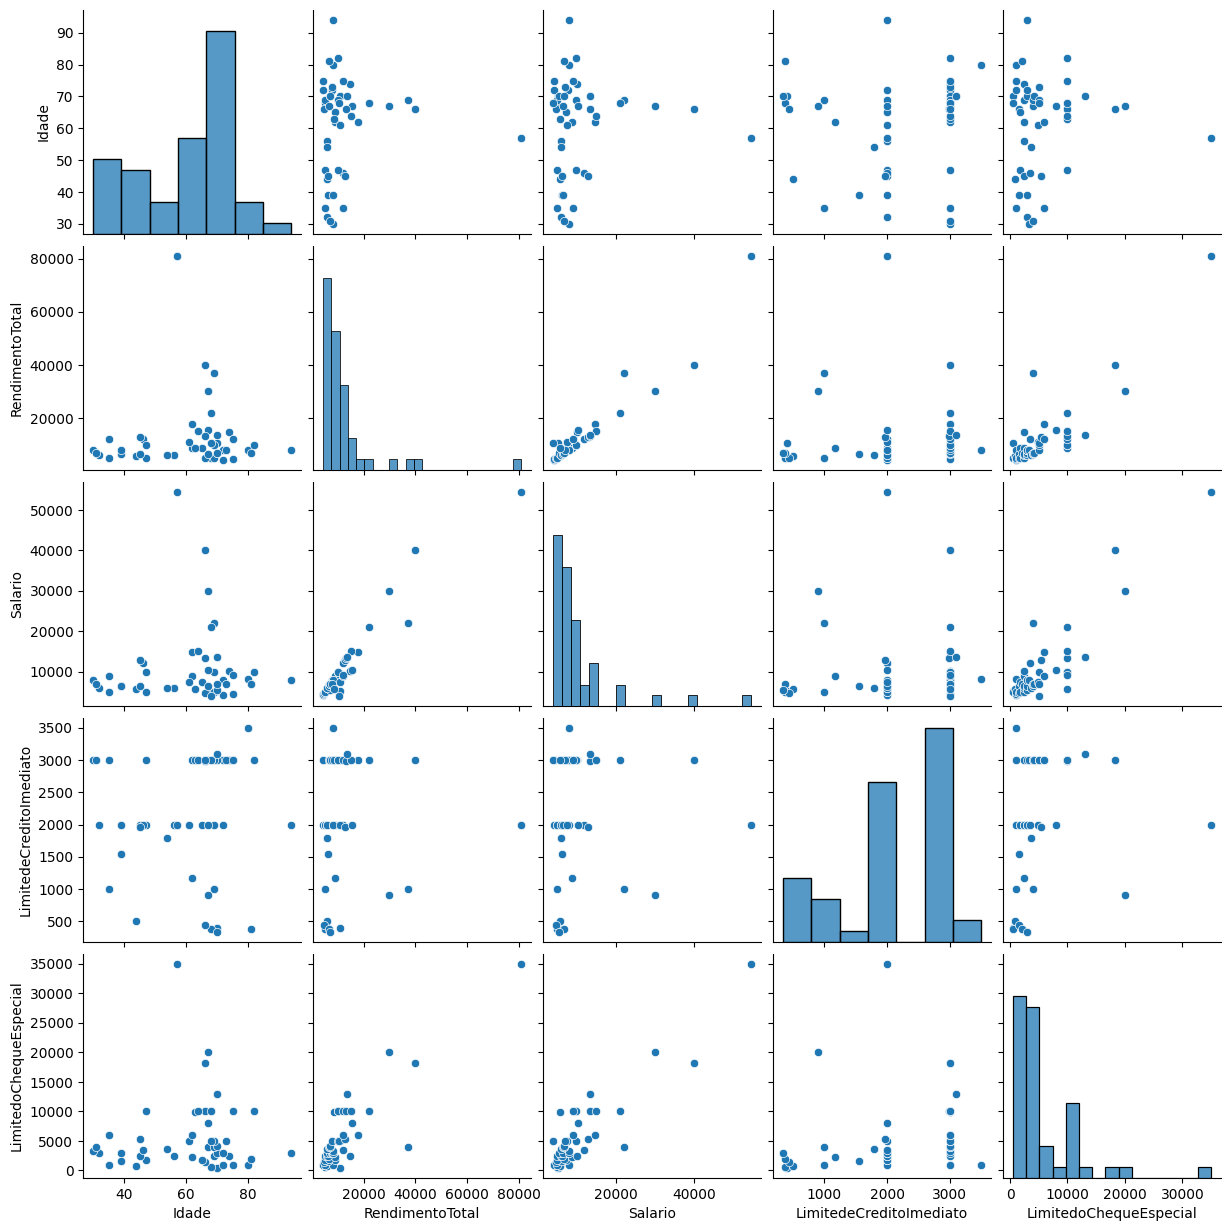

In [ ]:
sns.pairplot(limite);

In [ ]:
import statsmodels.formula.api as smf

In [ ]:
#modelo MRLS
function = 'LimitedoChequeEspecial~Idade+RendimentoTotal+Salario+LimitedeCreditoImediato'
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.799
Method:                     Least Squares   F-statistic:                     47.65
Date:                    Tue, 01 Aug 2023   Prob (F-statistic):           2.92e-15
Time:                            22:21:53   Log-Likelihood:                -445.61
No. Observations:                      48   AIC:                             901.2
Df Residuals:                          43   BIC:                             910.6
Df Model:                               4                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
#Remover a variável RendimentoTotal que tem o maior P-value
#Ainda temos variáveis acima de 5%
function = 'LimitedoChequeEspecial~RendimentoTotal+Salario+LimitedeCreditoImediato'
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.816
Model:                                OLS   Adj. R-squared:                  0.803
Method:                     Least Squares   F-statistic:                     64.97
Date:                    Tue, 01 Aug 2023   Prob (F-statistic):           3.34e-16
Time:                            22:22:10   Log-Likelihood:                -445.62
No. Observations:                      48   AIC:                             899.2
Df Residuals:                          44   BIC:                             906.7
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [ ]:
#Remover a variável RendimentoTotal que tem o maior P-value
#Ainda temos variáveis acima de 5%
function = 'LimitedoChequeEspecial~Salario+LimitedeCreditoImediato'
model = smf.ols(formula=function, data=limite).fit()
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     LimitedoChequeEspecial   R-squared:                       0.814
Model:                                OLS   Adj. R-squared:                  0.806
Method:                     Least Squares   F-statistic:                     98.47
Date:                    Tue, 01 Aug 2023   Prob (F-statistic):           3.66e-17
Time:                            22:22:22   Log-Likelihood:                -445.86
No. Observations:                      48   AIC:                             897.7
Df Residuals:                          45   BIC:                             903.3
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------